# Credit Card Clustering

Zaki Syaiful Hunafa

RMT-018

## 1. Introduction

Clustering is important in business because it allows businesses to identify patterns and trends in customer behavior, which can help them make more informed decisions and improve their marketing strategies. By grouping customers into distinct clusters based on their spending behavior, businesses can tailor their marketing messages and promotions to specific customer groups, increasing the effectiveness of their marketing efforts. Additionally, clustering analysis can help businesses identify areas for improvement in their products or services, such as identifying which features are most important to specific customer groups. Overall, analyzing clustering is an important tool for businesses to gain insights into their customer behavior and improve their marketing strategies to better meet the needs of their customers. 

Analyzing the clustering of tenure of credit card service for users is important for businesses because it can provide insights into the loyalty and retention of customers. By understanding the patterns and behaviors of customers who have held credit cards for longer periods of time, businesses can tailor their products and services to meet their needs and preferences. For example, if customers who have held credit cards for a longer period of time tend to make more purchases in installments, a business could offer installment payment plans or promotions to incentivize this behavior and retain these customers. Similarly, if customers who have held credit cards for a shorter period of time tend to use cash advances more frequently, a business could focus on improving their cash advance services to retain these customers. Overall, analyzing clustering tenure can help businesses identify and target different customer segments based on their credit card usage behaviors, leading to improved customer retention and loyalty.

At this analysis we will try to cluster the tenure user using K-Means. K-means clustering is a popular unsupervised machine learning algorithm that can be used to group data points into distinct clusters based on their similarity. In this analysis, we will be applying K-means clustering to the credit card dataset to identify patterns and clusters of customers based on their credit card usage behaviors. One of the variables we will be focusing on is "Tenure" or the length of time a customer has held a credit card. We will examine the relationships between this variable and other credit card usage variables to see if there are any meaningful clusters of customers that can be identified.

## 2. Import Libraries

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split model
from sklearn.model_selection import train_test_split


# To Scalling Numerical Column
from sklearn.preprocessing import StandardScaler

# Classifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

from sklearn.decomposition import PCA

# Create pipeline
from sklearn.pipeline import Pipeline

# Transform column
from sklearn.compose import ColumnTransformer

# Save model
import json
import joblib

# metrics
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading

Using below queries:

`SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information`
WHERE MOD(CUST_ID ,2) = 0`

In [243]:
df = pd.read_csv('h8dsft_P1G4_zaki.csv')

# first 20 rows
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [244]:
# last 10 rows
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


From the above dataset, here is the description of each column:

Name | Definition
---|---
`CUST_ID` | Identification of Credit Card holder (Categorical)
`BALANCE` | Balance amount left in their account to make purchases
`BALANCE_FREQUENCY` | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
`PURCHASES` | Amount of purchases made from account
`ONEOFF_PURCHASES` | Maximum purchase amount done in one-go
`INSTALLMENTS_PURCHASES` | Amount of purchase done in installment
`CASH_ADVANCE` | Cash in advance given by the user
`PURCHASES_FREQUENCY` | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
`ONEOFF_PURCHASES_FREQUENCY` | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
`PURCHASES_INSTALLMENTS_FREQUENCY` | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
`CASH_ADVANCE_FREQUENCY` | How frequently the cash in advance being paid
`CASHADVANCE_TRX` | Number of Transactions made with "Cash in Advanced"
`PURCHASES_TRX` | Numbe of purchase transactions made
`CREDIT_LIMIT` | Limit of Credit Card for user
`PAYMENTS` | Amount of Payment done by user
`MINIMUM_PAYMENTS` | Minimum amount of payments made by user
`PRC_FULL_PAYMENT` | Percent of full payment paid by user
`TENURE` | Tenure of credit card service for user

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [246]:
# check shape of dataset
df.shape

(4475, 18)

from this dataset known there are `4,475` rows and `18` columns

In [247]:
df[df.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


There is no row of duplciated data found on the dataset

In [248]:
# check null in dataset
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

`158` empty rows in column `MINIMUM_PAYMENT` are found. since this is just `3.5%`, i will drop all empty value

In [249]:
# drop empty value
df.dropna(axis=0, inplace=True)

In [250]:
# recheck if empty value is deleted
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [251]:
df = df.reset_index()

In [252]:
# drop cust_id
df = df.drop(['CUST_ID', 'index'], axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
1,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
2,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
3,2237.238086,1.000,120.0,120.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
4,424.994385,0.375,1200.0,1200.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,57.266292,56.720210,0.0,8


In [253]:
# recheck shape of dataset
df.shape

(4316, 17)

from this dataset known there are `4,316` rows and `18` columns

In [254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4316.0,1600.114511,2107.347942,0.000000,152.877191,916.693628,2112.447004,19043.138560
BALANCE_FREQUENCY,4316.0,0.895236,0.206730,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,4316.0,1025.274057,2241.729131,0.000000,44.662500,379.300000,1149.940000,49039.570000
ONEOFF_PURCHASES,4316.0,600.770438,1690.105736,0.000000,0.000000,35.955000,600.000000,40761.250000
INSTALLMENTS_PURCHASES,4316.0,424.888909,940.627467,0.000000,0.000000,95.845000,498.592500,22500.000000
CASH_ADVANCE,4316.0,986.980658,2159.134558,0.000000,0.000000,0.000000,1110.248526,29282.109150
PURCHASES_FREQUENCY,4316.0,0.495675,0.399564,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4316.0,0.205447,0.299252,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4316.0,0.369805,0.398217,0.000000,0.000000,0.181818,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4316.0,0.136236,0.200511,0.000000,0.000000,0.000000,0.250000,1.166667


From this dataset we can see the average of people choose 11 months as their tenure. This is have its own advantages and disadvantages. Advantages of choosing a longer tenure could include having smaller monthly payments, which can make it easier to manage one's cash flow and avoid defaulting on payments. However, there are also potential disadvantages to choosing a longer tenure. For example, the longer the repayment period, the more interest the individual will pay over time. Here we also can see the frequency columns such as purchases, one off purchases, installment, and cash advance have values that range between 0 and 1, where 0 represents that the respective type of transaction was not made at all during the given period, and 1 represents that the transaction was made every time the opportunity arose. Based on the mean values of these columns in the dataset, it can be observed that, on average, these transactions were not made frequently, as the mean values for these columns are closer to 0 than to 1. This means that, on average, people did not make purchases, one-off purchases, installments, or cash advances as frequently as they could have during the given period.

## 4. Exploratory Data Analysis (EDA)

In [255]:
# define obj and numerical column
cat_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']
num_cols = [col for col in df.columns if col not in cat_cols]

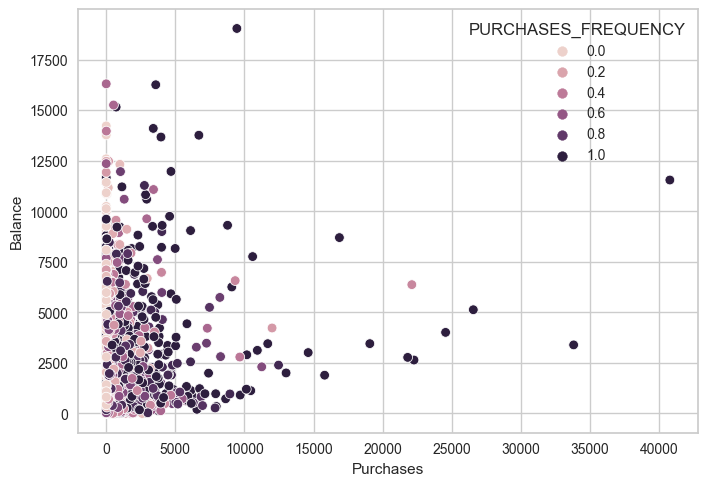

In [256]:
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='BALANCE', hue='PURCHASES_FREQUENCY')
plt.xlabel('Purchases')
plt.ylabel('Balance')
plt.show()

The majority of people with a high balance tend to purchase not more than `10,000`. There are some people that spend/purchase beyond their balance. This possibly could be fraud, because they frequently purchase beyond their balance.

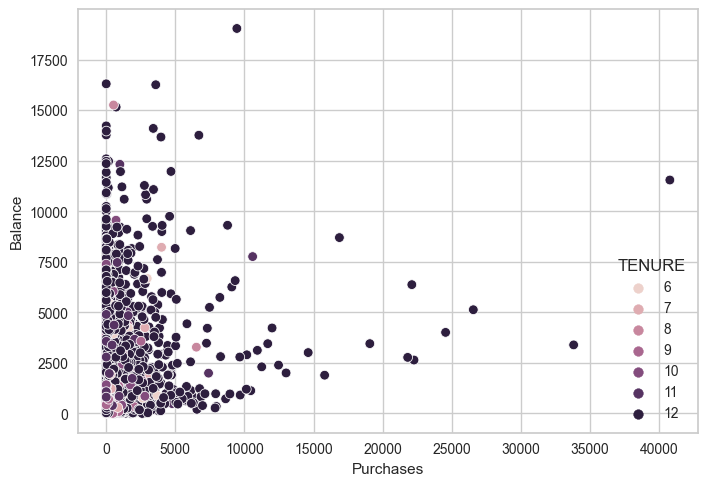

In [257]:
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='BALANCE', hue='TENURE')
plt.xlabel('Purchases')
plt.ylabel('Balance')
plt.show()

Here we can see the majority of the people are choosing a long tenure. Approximately 9-12 months including people who were suspected as fraud because they purchase frequently beyond their credit balance who also took 12 months tenure.

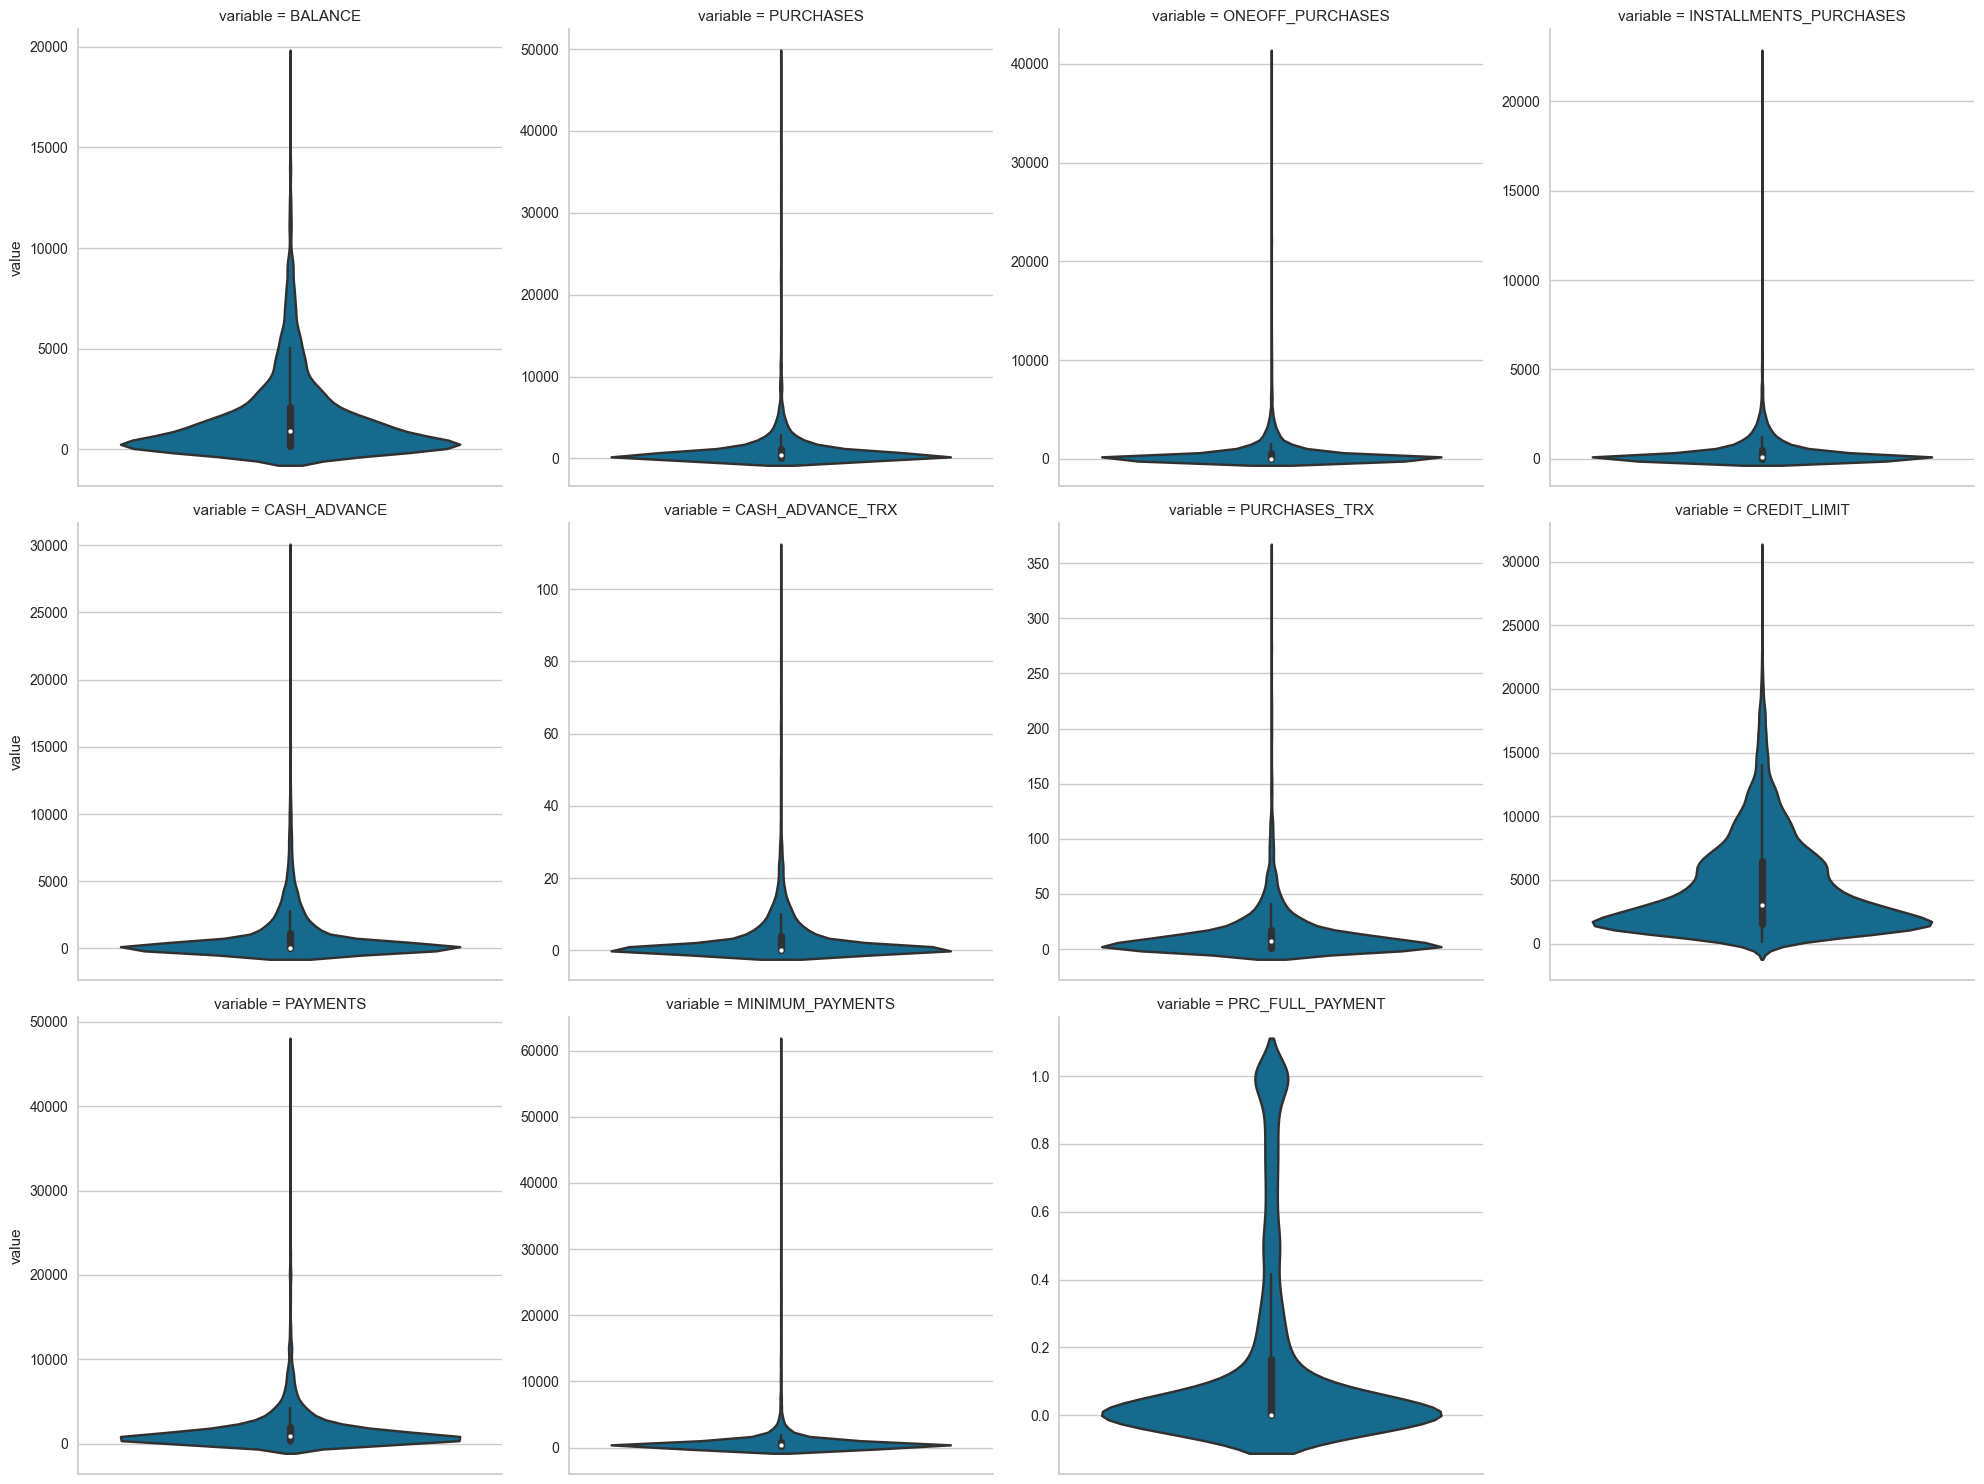

In [258]:
sns.catplot(data = pd.melt(df,value_vars = num_cols),
            kind = 'violin',
            y = 'value',
            col = 'variable',
            sharey = False,
            col_wrap = 4
           )

Here we can see the distribution of the data is severely skewed. But for this analysis we will not handle the outliers because it could be a good information regarding the cluster of the credit card holder.

<Axes: >

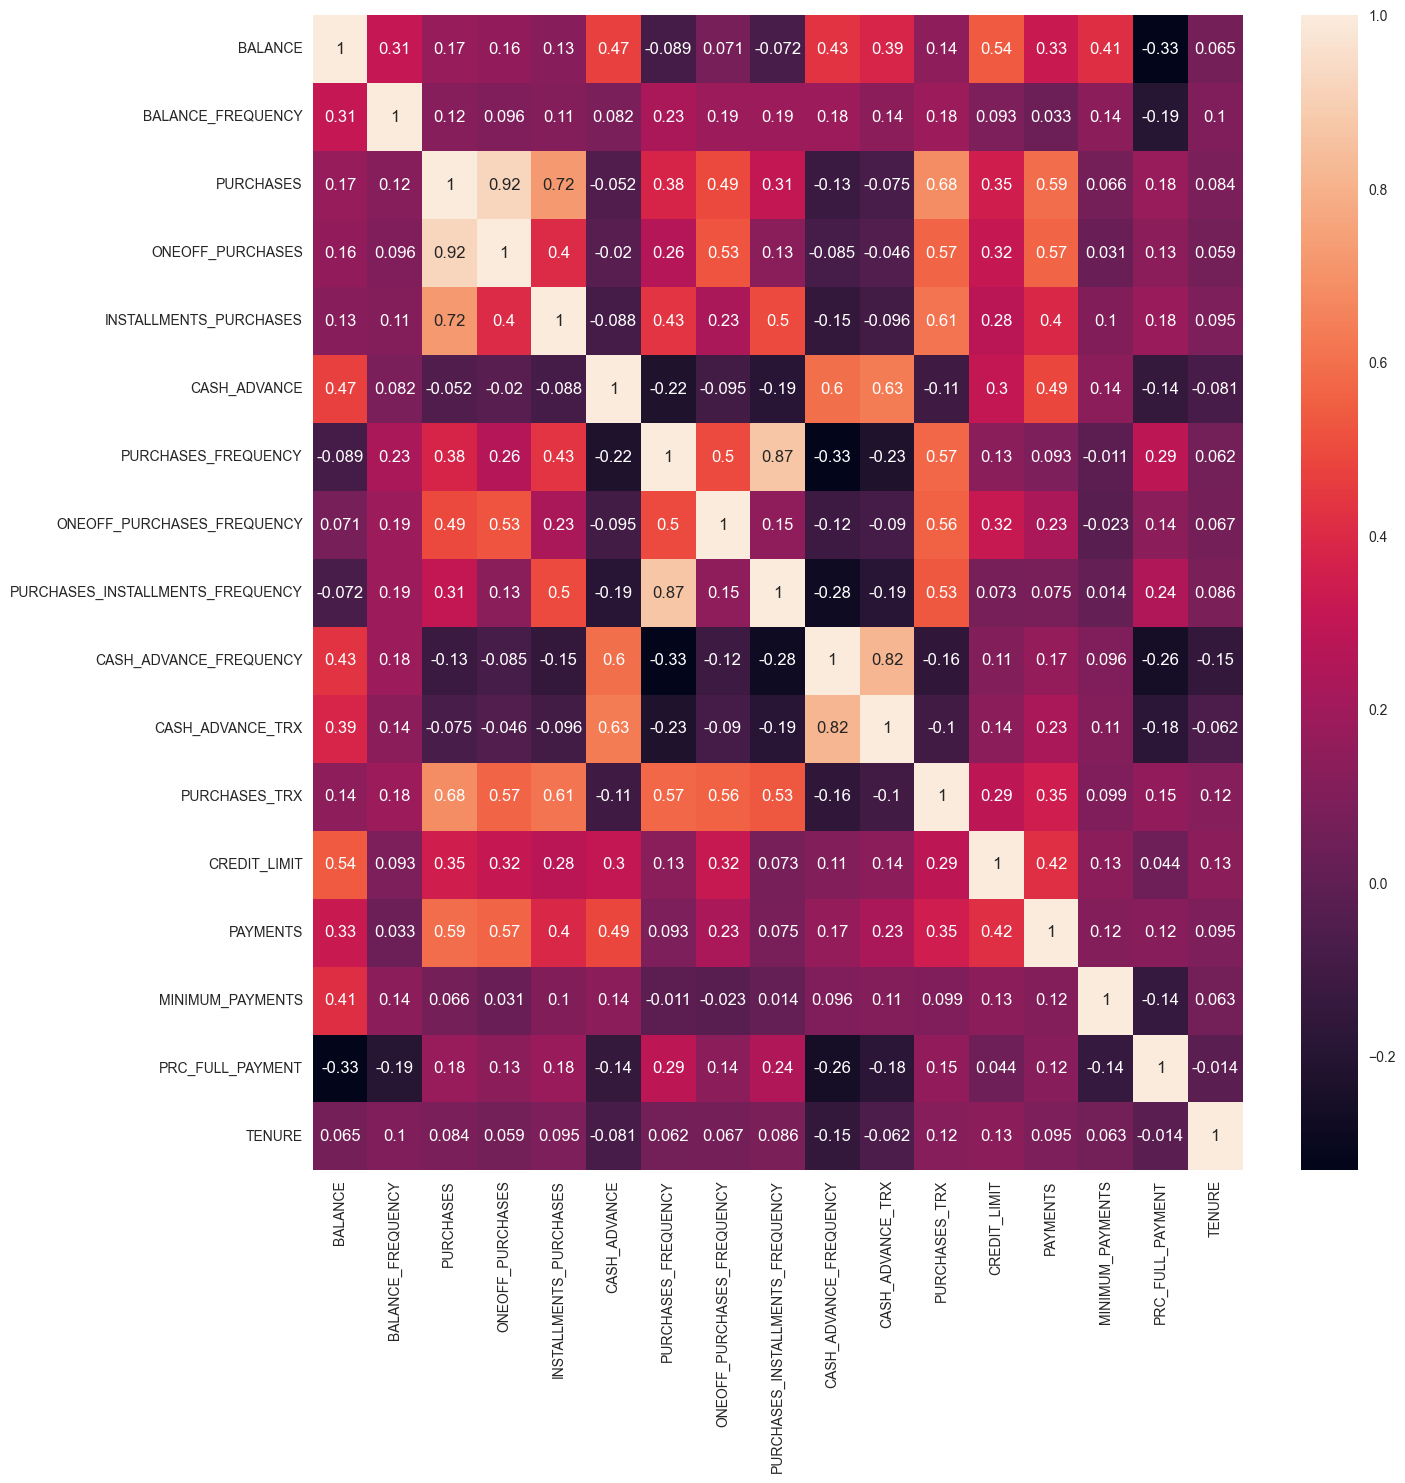

In [259]:
fig, ax = plt.subplots(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True)

Here we can see how the correlation of each feature towards tenure, unfortunately it created bias to only high tenure. For example we can see how positively correlated the `BALANCE` with `TENURE`, because people with high balance on their account will tend to take a long tenure. Meanwhile for financial institution in this case bank is benefited from both short and long tenure. Long-tenured customers may be more profitable for a bank because they are more likely to have established credit and spending patterns, which can make it easier for the bank to assess risk and offer additional products and services. They may also be more likely to have higher credit limits and spend more on their credit cards over time, generating more revenue for the bank.

On the other hand, short-tenured customers may be more profitable in terms of acquisition and retention. Short-tenured customers may be more likely to sign up for credit cards with lucrative sign-up bonuses or introductory offers, and may be more likely to switch banks if they are not satisfied with their current provider. Additionally, short-tenured customers may be more likely to use their credit cards frequently in order to accumulate rewards points, generating transaction fees for the bank.

For reasons above, I will use all features in this dataset for the analysis `except` for `CUST_ID` and `index`.

## 5. Feature Engineer

#### Scale Num Cols

In [260]:
# Feature Scalling using StandardScaler
scaler = StandardScaler()
df_pca = scaler.fit_transform(df[num_cols])
df_pca

array([[-0.31157956, -0.41145958, -0.29455442, ..., -0.52406064,
        -0.19257025, -0.5439301 ],
       [-0.54039046, -0.19642207, -0.00933212, ..., -0.50980931,
        -0.3047759 , -0.5439301 ],
       [-0.25937013,  0.1894855 ,  0.50252948, ..., -0.46340635,
        -0.27206364, -0.5439301 ],
       ...,
       [ 0.84778755, -0.20713825, -0.10269804, ..., -0.24920417,
         0.01362574, -0.5439301 ],
       [ 1.5378602 ,  0.25459011,  0.5888832 , ..., -0.29363743,
         0.6600379 , -0.24056163],
       [ 0.17886759,  0.00301853, -0.2212369 , ...,  0.42400103,
         0.02431666, -0.24056163]])

## 6. Model Definition

In [261]:
# define model
model = KMeans()

# pca
pca= PCA(n_components=2)

## 7. Model Training

#### PCA

In [262]:

# implement pca to dataset
reduced_data= pca.fit_transform(df_pca)

### Look for best K : Elbow

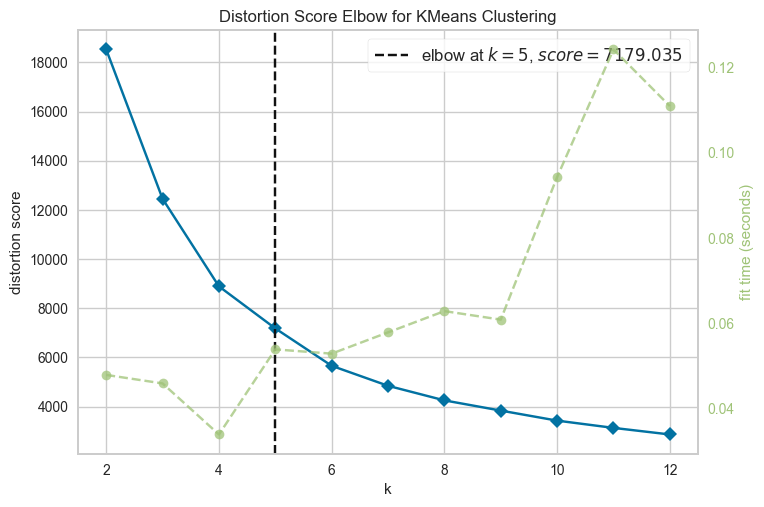

In [263]:
for i in range(2,10):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
visualizer = KElbowVisualizer(model,k = 12)
visualizer.fit(reduced_data)
visualizer.show()
plt.show()

from the elbow method, we found the best n_cluster is 5

In [264]:
# implement n_cluster =5 as parameter
km = KMeans(n_clusters=5, random_state=42)
km.fit(reduced_data)

KMeans(n_clusters=5, random_state=42)

In [265]:
# predict clusters in reduce_data
clusters = km.predict(reduced_data)

In [266]:
reduced_data= pd.DataFrame(reduced_data, columns= ['PC1','PC2'])
reduced_data

,PC1,PC2
0,-1.409051,-0.407720
1,-1.250540,-0.618960
2,-0.729845,-0.616532
3,-1.102276,-0.029017
4,-0.989952,-0.748078
...,...,...
4311,-1.116469,0.542097
4312,-0.385638,1.242917
4313,0.466279,1.513153
4314,1.092533,2.538671


In [267]:
# define column clusters with value
reduced_data['cluster']= clusters

In [268]:
# dataset reduced_data
reduced_data

,PC1,PC2,cluster
0,-1.409051,-0.407720,1
1,-1.250540,-0.618960,1
2,-0.729845,-0.616532,1
3,-1.102276,-0.029017,1
4,-0.989952,-0.748078,1
...,...,...,...
4311,-1.116469,0.542097,1
4312,-0.385638,1.242917,3
4313,0.466279,1.513153,3
4314,1.092533,2.538671,3


In [269]:
# combine columns from old df with cluster
pca_df_cluster = pd.concat([df[num_cols], reduced_data], axis=1)
pca_df_cluster

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PC1,PC2,cluster
0,943.584041,103.00,103.00,0.00,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,-1.409051,-0.407720,1
1,461.455720,585.00,585.00,0.00,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,-1.250540,-0.618960,1
2,1053.594730,1450.00,1450.00,0.00,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,-0.729845,-0.616532,1
3,2237.238086,120.00,120.00,0.00,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,-1.102276,-0.029017,1
4,424.994385,1200.00,1200.00,0.00,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,-0.989952,-0.748078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,0.00,0.00,0.00,1259.571764,9,0,1200.0,1379.635287,271.364415,0.090909,-1.116469,0.542097,1
4312,809.582978,0.00,0.00,0.00,3819.672466,7,0,4150.0,4372.148648,241.645387,0.090909,-0.385638,1.242917,3
4313,3386.490883,560.98,427.22,133.76,2008.153534,9,20,10100.0,1039.000037,886.050237,0.000000,0.466279,1.513153,3
4314,4840.545574,1595.93,1595.93,0.00,4359.325750,17,25,6000.0,905.844846,2376.919568,0.090909,1.092533,2.538671,3


## 8. Model Evaluation

### K-Means Clustering

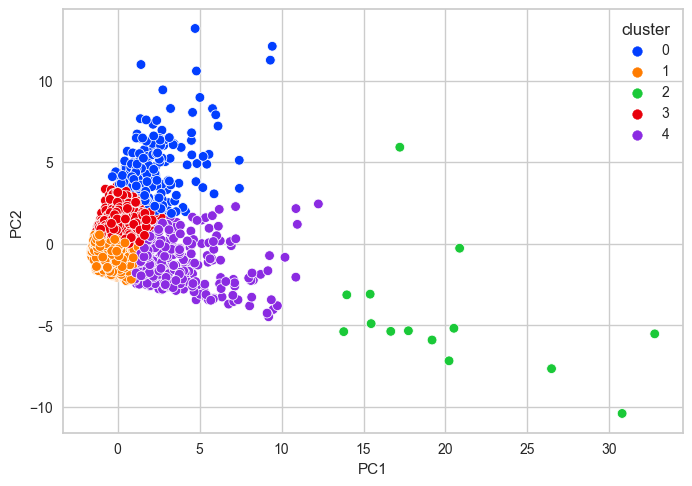

In [270]:
sns.scatterplot(data=pca_df_cluster, x="PC1", y="PC2", hue="cluster",palette="bright")
plt.show()

In [271]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4312,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4313,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4314,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


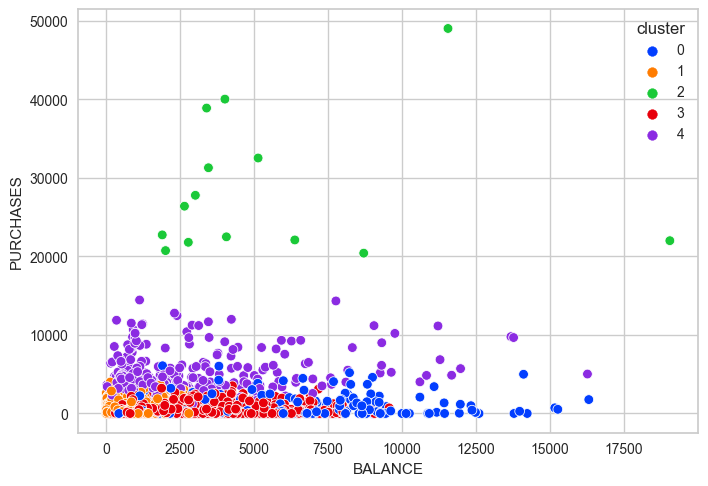

In [272]:
sns.scatterplot(data=pca_df_cluster, x="BALANCE", y="PURCHASES", hue="cluster",palette="bright")
plt.show()

* Cluster 0: This cluster represent CC holder that have `High Balance` and `Low Expenditure`
* Cluster 1: This cluster represent CC holder that have `Low Balance` and `Low Expenditure`
* Cluster 2: This cluster represent CC holder that have `Low Balance` but `High Expenditure`
* Cluster 3: This cluster represent CC holder that have `Medium Balance` and `Low Expenditure`
* Cluster 4: This cluster represent CC holder that have `High Balance` and `High Expenditure`

### Eval 1: Sum Of Squared Errors

The sum of squared errors (SSE) is a metric used to evaluate the performance of a clustering algorithm. It measures the total squared distance between each data point and the centroid of its assigned cluster. A lower SSE indicates that the data points are closer to their assigned centroids and that the clusters are more compact.

The SSE is listed for each value of k (number of clusters) that was tested during the clustering process. As the number of clusters increases, the SSE typically decreases, since there are more centroids to assign the data points to. However, adding too many clusters may result in overfitting and decreased interpretability.

In [273]:
sse = []
for i in range(1,10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(reduced_data)
    sse_ = model.inertia_
    sse.append(sse_)
    print(i,sse_)

1 32656.076630554267
2 22816.68720291551
3 15358.982732950362
4 11201.931689149782
5 7179.034914349448
6 5999.133464695335
7 5039.028951514073
8 4482.866029216487
9 4042.9880355098126


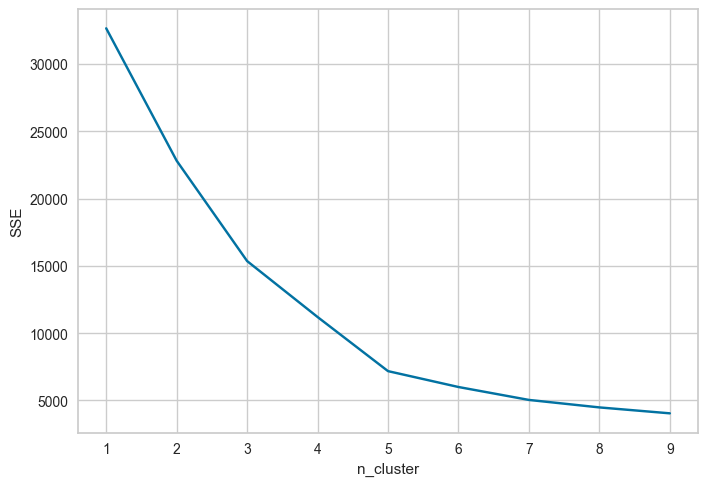

In [274]:
plt.plot(range(1,10), sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

* k=1: The SSE is 32656.076630554242 when using only one cluster. This represents the total squared distance between each data point and the single centroid. This is the highest SSE value because there is only one cluster and all data points are assigned to it.

* k=2: The SSE decreases to 22816.6872029155 when using two clusters, indicating that the data points are closer to their assigned centroids compared to using just one cluster.

* k=3: The SSE further decreases to 15358.98273295035 when using three clusters, indicating that the addition of a third cluster has improved the clustering performance.

* k=4: The SSE decreases again to 11201.931689149777 when using four clusters, indicating that adding a fourth cluster has further improved the clustering performance.

* k=5: The SSE continues to decrease to 7179.034914349444 when using five clusters.

* k=6: The SSE decreases again to 5999.133464695333 when using six clusters.

* k=7: The SSE decreases again to 5039.0289515140685 when using seven clusters.

* k=8: The SSE decreases slightly to 4482.866029216484 when using eight clusters.

* k=9: The SSE continues to decrease to 4042.988035509811 when using nine clusters.

Overall, it seems that the SSE values are decreasing as the number of clusters increases up to a certain point `(around k=5)`, after which the decrease becomes less pronounced. The optimal number of clusters would depend on the specific problem and the desired level of interpretability. It may be helpful to visualize the clusters to determine which k value provides the most meaningful and interpretable results.

### Eval 2: Rand Score

The Rand Score is a measure of how similar the clustering results are to the true labels or ground truth. It ranges from 0 to 1, where 0 indicates no agreement between the clustering results and the ground truth, and 1 indicates perfect agreement.

In [275]:
rand = []
for i in range(1,10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(reduced_data)
    rand_ = metrics.adjusted_rand_score(clusters, model.labels_)
    rand.append(rand_)
    print(i,rand_)

1 0.0
2 0.3229423234314782
3 0.9556896292950362
4 0.9901044569121406
5 1.0
6 0.9912141838642895
7 0.6018577977127443
8 0.602266089106486
9 0.560918170713123


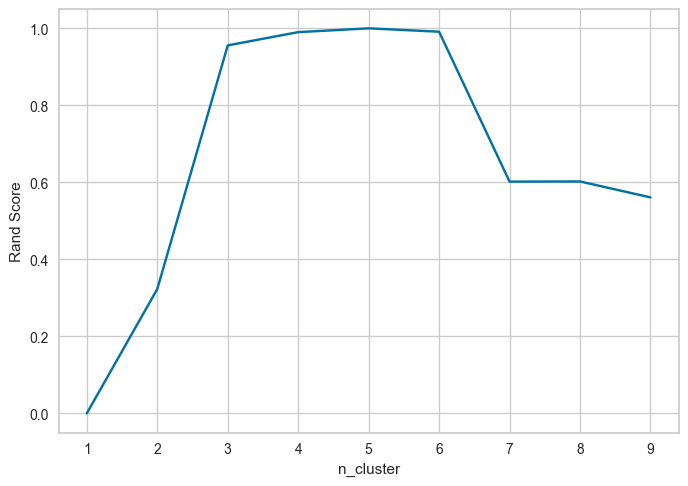

In [276]:
plt.plot(range(1,10), rand)
plt.xlabel('n_cluster')
plt.ylabel('Rand Score')
plt.show()

In this case, for 3 clusters, the Rand Score is 0.955, which means that the clustering results are highly similar to the ground truth. Similarly, for 5 clusters, the Rand Score is 1.0, indicating that the clustering results perfectly match the ground truth. Hence, 5 clusters seemed to be perfect `n_cluster`

However, for some other numbers of clusters, such as 1 or 2, the Rand Score is 0, which means that the clustering results do not agree with the ground truth at all.

Overall, the Rand Score provides a useful metric for evaluating the performance of clustering algorithms and selecting the optimal number of clusters. A high Rand Score indicates good clustering results, while a low Rand Score suggests that the clustering algorithm may not be appropriate for the dataset or that the number of clusters is not optimal.

### Eval 3: Silhoutte Score

The silhouette score is a metric used to evaluate the quality of clustering results. It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters.

For n_clusters = 4 The average silhouette_score is : 0.59
For n_clusters = 5 The average silhouette_score is : 0.6
For n_clusters = 6 The average silhouette_score is : 0.61


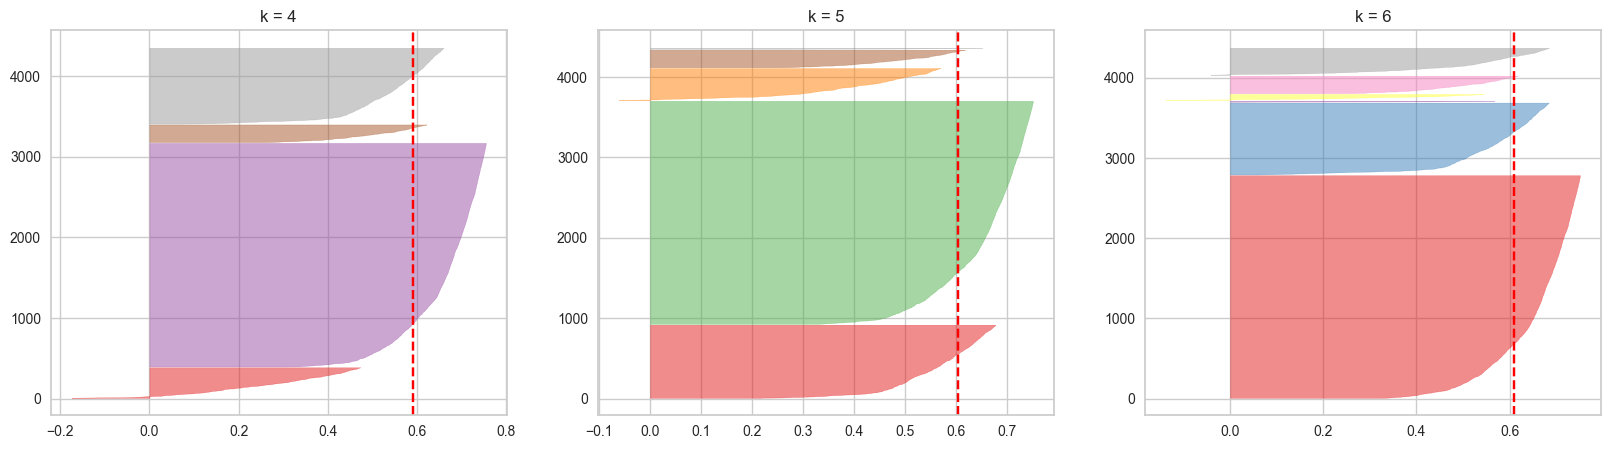

In [277]:
fig,ax = plt.subplots(1,3,figsize = (20,5))
col = 0
for k in [4,5,6]:
    model = KMeans(n_clusters = k, random_state = 42)
    visualizer = SilhouetteVisualizer(model, ax = ax[col])
    visualizer.fit(reduced_data)
    ax[col].set_title(f'k = {k}')
    col += 1
    print("For n_clusters =", k, "The average silhouette_score is :", round(np.mean(visualizer.silhouette_score_), 2))


In this analysis, I evaluated the silhouette score for different numbers of clusters, and for each number of clusters, you have calculated the average silhouette score. For example, for 4 clusters, the `average silhouette score is 0.59`, which indicates that the clustering results are fairly good, with well-defined clusters and relatively good separation between the clusters. Similarly, for `5 clusters`, the average `silhouette score is 0.6`, and for `6 clusters, it is 0.61`.

The higher the average silhouette score, the better the clustering results. In general, a score above 0.5 is considered to be a good clustering result, while a score above 0.7 is considered to be a strong result. Here for `n_cluster 6 are the highest` but `5 have better distribution` so n_cluster seemed to be a best fit.

Overall, the silhouette score provides a useful metric for evaluating the performance of clustering algorithms and selecting the optimal number of clusters. A high silhouette score indicates good clustering results, while a low score suggests that the clustering algorithm may not be appropriate for the dataset or that the number of clusters is not optimal.

## 9. Save Model

In [278]:
# Define the column transformer to preprocess the input data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols), # num_cols is a list of numeric columns
        ('cat', 'passthrough', cat_cols),   # cat_cols is a list of categorical columns
        ('pca', pca, num_cols) # apply PCA to numeric columns
    ])

# Define the pipeline to preprocess the input data and apply KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', km)
])

# Fit the pipeline on the training data
pipeline.fit(df)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['BALANCE', 'PURCHASES',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'CASH_ADVANCE_TRX',
                                                   'PURCHASES_TRX',
                                                   'CREDIT_LIMIT', 'PAYMENTS',
                                                   'MINIMUM_PAYMENTS',
                                                   'PRC_FULL_PAYMENT']),
                                                 ('cat', 'passthrough',
                                                  ['BALANCE_FREQUENCY',
                                                   'PURCHASES_FREQUENCY',
                                                   'ONEOFF_PURCHASES_FREQUENCY',
                                                   'PURCHASES_INSTALLMENTS_FREQUENCY',
                                                   'CASH_ADVANCE_FREQUENCY',
                                                   'TENURE']),
                                                 ('pca', PCA(n_components=2),
                                                  ['BALANCE', 'PURCHASES',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'CASH_ADVANCE_TRX',
                                                   'PURCHASES_TRX',
                                                   'CREDIT_LIMIT', 'PAYMENTS',
                                                   'MINIMUM_PAYMENTS',
                                                   'PRC_FULL_PAYMENT'])])),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [279]:
# Saving pipeline as pipeline.pkl
with open ('pipeline.pkl', 'wb') as file_1:
    joblib.dump(pipeline, file_1)

with open('list_num_cols.txt', 'w') as file_2:
    json.dump(num_cols, file_2)

with open('list_cat_cols.txt', 'w') as file_3:
    json.dump(cat_cols, file_3)

## 10. Inference

In [280]:
obs = df.sample(1,random_state = 1)
display(obs)
labels = pipeline.predict(obs)
print('the customer is on cluster', labels)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2334,1271.429631,1.0,0.0,0.0,0.0,678.525863,0.0,0.0,0.0,0.25,3,0,1500.0,526.910053,416.325411,0.0,12


the customer is on cluster [1]


## 11. Conclusion

* Cluster 0: This cluster represents credit card holders who have a high balance but low expenditure. This group of customers may be financially conservative and could potentially benefit from targeted marketing campaigns to encourage them to spend more. The bank could offer rewards programs or discounts to incentivize these customers to make purchases with their credit card.

* Cluster 1: This cluster represents credit card holders who have a low balance and low expenditure. This group of customers may be less financially stable and may need guidance on how to manage their finances. The bank could offer financial literacy resources or credit counseling services to help these customers improve their financial situation.

* Cluster 2: This cluster represents credit card holders who have a low balance but high expenditure. This group of customers may be high-spending individuals who are using their credit card as a means of financing their lifestyle. The bank could offer them credit limit increases or other financing options to help them manage their spending and avoid accumulating high levels of debt.

* Cluster 3: This cluster represents credit card holders who have a medium balance and low expenditure. This group of customers may be using their credit card sparingly and may be financially stable. The bank could offer them targeted rewards programs or discounts to encourage them to use their credit card more frequently.

* Cluster 4: This cluster represents credit card holders who have a high balance and high expenditure. This group of customers may be high net worth individuals who are using their credit card for high-value purchases. The bank could offer them premium rewards programs or concierge services to cater to their needs and encourage them to continue using their credit card.

It's important to note that these recommendations are just potential ideas and may not apply to all customers within each cluster. The bank should use additional data and insights to develop more targeted strategies for each cluster of customers.

To improve the model there are several tips might help:

- Trying other clustering algorithms: K-Means is a popular clustering algorithm, but it may not always be the best choice for your data. Consider trying other clustering algorithms such as hierarchical clustering or DBSCAN to see if they produce better results.

- Incorporating domain knowledge: Incorporating domain knowledge into the clustering analysis can help to improve the accuracy and interpretability of the results. This can include incorporating expert knowledge or incorporating additional data sources.

### CONCEPTUAL PROBLEMS

1. Inertia is a metric used to evaluate the performance of the K-Means clustering algorithm. It measures the sum of squared distances of samples to their closest cluster center. The objective of the K-Means algorithm is to minimize the inertia.

2. The Elbow Method is a technique used to determine the optimal number of clusters for a K-Means clustering algorithm. It is based on plotting the within-cluster sum of squares (WSS) as a function of the number of clusters, and identifying the "elbow" in the curve where the rate of decrease in WSS slows down. The number of clusters corresponding to the elbow is often chosen as the optimal number of clusters

    To use the elbow method, you can follow these steps:

    - First, run KMeans clustering for a range of different values of K (the number of clusters) on your dataset.
    - For each value of K, compute the sum of squared distances of samples to their closest cluster center, also known as the Within-Cluster-Sum-of-Squares (WCSS).
    - Plot the WCSS values against the number of clusters, K.
    - Identify the "elbow" in the plot, which is the point of diminishing returns where adding more clusters does not lead to a significant reduction in WCSS.


    The advantages of using the elbow method are that it is a quick and easy way to determine the optimal number of clusters, and it does not require any prior knowledge about the dataset. However, the elbow method is not always reliable, especially for datasets with complex structures or noise. In addition, the "elbow" in the plot can be subjective, and different analysts may identify different optimal values of K. Therefore, it is important to use the elbow method in conjunction with other methods to ensure a robust and accurate clustering analysis.



## 12. Reference

- https://medium.com/@afrizalfir/kmeans-clustering-dan-implementasinya-5e967dc604cf
- https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781784398637/1/ch01lvl1sec11/introducing-k-means-clustering
- https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2
- https://towardsdatascience.com/explain-ml-in-a-simple-way-k-means-clustering-e925d019743b
- https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb